<a href="https://colab.research.google.com/github/Yen617/DL/blob/main/Naive_Method(Colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def naive_forecast(data):
  forecasts = []
  for i in range(len(data)):
    if i == 0:
      forecast = data[i]
    else:
      forecast = data[i-1]
    forecasts.append(forecast)
  return forecasts

In [4]:
#load data(sometimes need to use "/")
#df = pd.read_csv('D:/pythonData/python_demo_data/Titanic_demo_1.csv')
# Colab
data = pd.read_csv('/content/drive/MyDrive/JPY=X(1).csv')
data

,Y,Y1
0,110.838997,NaN
1,110.795998,110.838997
2,111.436996,110.795998
3,110.462997,111.436996
4,110.380997,110.462997
...,...,...
1543,139.283005,138.598007
1544,140.016998,139.283005
1545,140.871002,140.016998
1546,140.440994,140.871002


In [5]:
column_to_predict = 'Y'
data_to_predict = data[column_to_predict].values

In [6]:
forecasted_values = naive_forecast(data_to_predict)

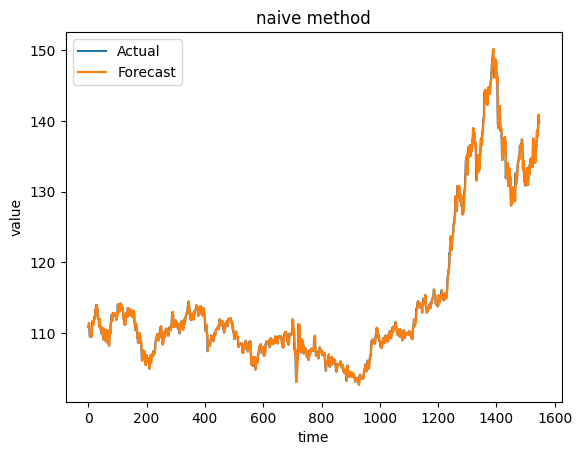

In [7]:
plt.plot(data_to_predict, label='Actual')
plt.plot(forecasted_values, label='Forecast')
plt.xlabel('time')
plt.ylabel('value')
plt.title('naive method')
plt.legend()
plt.show()

In [8]:
import csv
import numpy as np

data_float = []
with open('/content/drive/MyDrive/JPY=X(1).csv', 'r') as file:
    reader = csv.reader(file)

    for row in reader:
        if len(row) == 2:
            try:
                value1 = float(row[0])
                value2 = float(row[1])
                data_float.append([value1, value2])
            except ValueError:
                continue
            
for row in data_float:
    print(row)

[110.795998, 110.838997]
[111.436996, 110.795998]
[110.462997, 111.436996]
[110.380997, 110.462997]
[109.509003, 110.380997]
[109.900002, 109.509003]
[109.859001, 109.900002]
[110.288002, 109.859001]
[109.920998, 110.288002]
[110.055, 109.920998]
[109.445999, 110.055]
[110.952003, 109.445999]
[110.954002, 110.952003]
[111.672997, 110.954002]
[111.334, 111.672997]
[111.309998, 111.334]
[111.290001, 111.309998]
[111.238998, 111.290001]
[111.858002, 111.238998]
[112.188004, 111.858002]
[112.353996, 112.188004]
[112.009003, 112.353996]
[112.262001, 112.009003]
[113.386002, 112.262001]
[112.961998, 113.386002]
[113.186996, 112.961998]
[113.149002, 113.186996]
[113.985001, 113.149002]
[113.748001, 113.985001]
[113.334999, 113.748001]
[113.417999, 113.334999]
[112.397003, 113.417999]
[112.581001, 112.397003]
[111.995003, 112.581001]
[111.876999, 111.995003]
[111.885002, 111.876999]
[110.945, 111.885002]
[111.232002, 110.945]
[112.002998, 111.232002]
[111.127998, 112.002998]
[111.097, 111.1279

In [9]:
def MAE_calculate(actual, predict):
  n = len(actual)
    
  if n == 0:
      raise ValueError("actual and predict arrays should not be empty.")
    
  error_sum = sum(abs(actual[i] - predict[i]) for i in range(n))
  MAE = error_sum / n
  return MAE

def MSE_calculate(actual, predict):
  actual = np.array(actual)
  predict = np.array(predict)
  MSE = np.mean((actual - predict) ** 2)
  return MSE

def RMSE_calculate(actual, predict):
  actual = np.array(actual)
  predict = np.array(predict)
  squared_errors = (actual - predict) ** 2
  RMSE = np.sqrt(np.mean(squared_errors))
  return RMSE

def MAPE_calculate(actual, predict):
  actual = np.array(actual)
  predict = np.array(predict)
  ape = np.abs((actual - predict) / actual)
  ape[np.isinf(ape)] = 0.0  # 处理分母为0的情况
  ape[np.isnan(ape)] = 0.0  # 处理NaN值的情况
  MAPE = np.mean(ape) * 100
  return MAPE

def SMAPE_calculate(actual, predict):
  actual = np.array(actual)
  predict = np.array(predict)
  ape = np.abs(actual - predict) / ((np.abs(actual) + np.abs(predict)) / 2)
  ape[np.isinf(ape)] = 0.0  # 处理分母为0的情况
  ape[np.isnan(ape)] = 0.0  # 处理NaN值的情况
  SMAPE = np.mean(ape) * 100
  return SMAPE

def RAE_calculate(actual, predict):
  actual = np.array(actual)
  predict = np.array(predict)
  absolute_errors = np.abs(actual - predict)
  denominator = np.sum(np.abs(actual - np.mean(actual)))
  RAE = np.sum(absolute_errors/denominator)
  return RAE

def MRAE_calculate(actual, predict):
  actual = np.array(actual)
  predict = np.array(predict)
  n=len(actual)
  absolute_errors = np.abs(actual - predict)
  denominator = np.sum(np.abs(actual - np.mean(actual)))
  RAE = np.sum(absolute_errors/denominator)
  #MRAE = np.mean(RAE)
  MRAE = RAE / n
  return MRAE

def MdRAE_calculate(actual, predict, bench=None):
  if bench==None:
    bench=np.mean(actual)
    MdRAE=np.median([abs(a - p) / abs(a - bench) for a, p in zip(actual, predict)])
    return MdRAE,bench
  else:
    MdRAE=np.median([abs(a - p) / abs(a - b) for a, p, b in zip(actual, predict, bench)])
    return MdRAE

def RSE_calculate(actual, predict, Root=False):
  actual = np.array(actual)
  predict = np.array(predict)
  mse = np.mean((actual - predict)**2)
  denominator = np.var(actual)
  RSE=mse/denominator
    
  if Root==True:
      return np.sqrt(RSE)
  else:
      return RSE

In [10]:
column1 = [row[0] for row in data_float]
column2 = [row[1] for row in data_float]

In [11]:
import numpy as np

MAE=MAE_calculate(column1, column2)
rounded_MAE = np.round(MAE, 3)
MSE=MSE_calculate(column1, column2)
rounded_MSE = np.round(MSE, 3)
RMSE=RMSE_calculate(column1, column2)
rounded_RMSE = np.round(RMSE, 3)
MAPE=MAPE_calculate(column1, column2)
rounded_MAPE = np.round(MAPE, 3)
SMAPE=SMAPE_calculate(column1, column2)
rounded_SMAPE = np.round(SMAPE, 3)
RAE=RAE_calculate(column1, column2)
rounded_RAE = np.round(RAE, 3)
MRAE=MRAE_calculate(column1, column2)
RSE=RSE_calculate(column1, column2, Root=False)
rounded_RSE = np.round(RSE, 3)
RRSE=RSE_calculate(column1, column2, Root=True)
rounded_RRSE = np.round(RRSE, 3)

print('MAE:', rounded_MAE)
print('MSE:', rounded_MSE)
print('RMSE:', rounded_RMSE)
print('MAPE:', rounded_MAPE,'%')
print('SMAPE:', rounded_SMAPE,'%')
print('RAE:', rounded_RAE)
print('MRAE:', MRAE)
result = MdRAE_calculate(column1, column2)
if isinstance(result, tuple):
    MdRAE = result[0]
    bench = result[1]
    print('MdRAE:', round(MdRAE, 3), 'bench:', round(bench, 3))
else:
    MdRAE = result
    print('MdRAE:', round(MdRAE, 3))
print('RSE:', rounded_RSE)
print('RRSE:', rounded_RRSE)

MAE: 0.432
MSE: 0.395
RMSE: 0.629
MAPE: 0.367 %
SMAPE: 0.367 %
RAE: 0.053
MRAE: 3.401818568940717e-05
MdRAE: 0.048 bench: 114.719
RSE: 0.003
RRSE: 0.058
